# Wine Classification using Naive Bayes Formulation

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
wine = datasets.load_wine()

In [2]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
wine.data[0:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
wine.target[0:2]

array([0, 0])

## Heatmap for Correlation of Parameters

Correlation co-efficients for all pairwise combinations

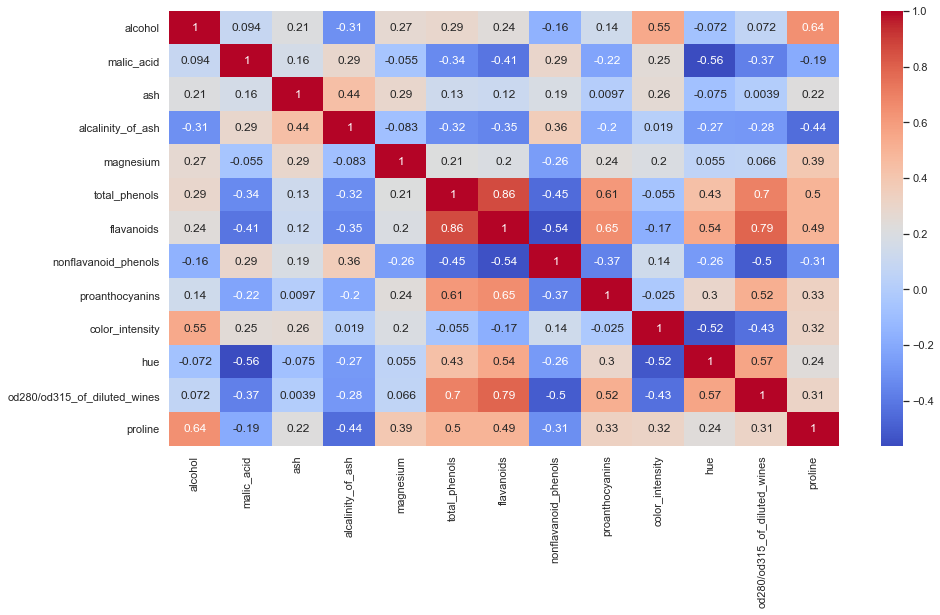

In [23]:
corr = df[df.columns].corr()
sns.set(rc={"figure.figsize":(15, 8)})
sns.heatmap(corr, cmap="coolwarm", annot = True);

## Feature reduction
'ash' and 'hue' are the least correlated to other factors. So dropping the variable would cause the least bias.

In [10]:
X= df.drop(['ash', 'hue'], axis = 1)
X.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,3.40,1050.0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,3.17,1185.0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,3.45,1480.0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,2.93,735.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=100)

In [12]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [13]:
mn = MultinomialNB()
mn.fit(X_train,y_train)
mn.score(X_test,y_test)

0.7777777777777778